# Tugas Pengdat Kelompok 4
---
### Anggota Kelompok:
* Muhammad Zaki Novendra
* Muhammad Zelot Zoha
* Melathi Andhara Putri
* Muhammad Iqbal Baihaqi
<br>
link Dataset : `https://archive.ics.uci.edu/dataset/294/combined+cycle+power+plant` <br>
link Paper : `https://doi.org/10.1016/j.ijepes.2014.02.027`

---

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
import plotly.express as px
from PIL import Image

In [4]:
def pemanggildata(k, DATASET_PATH):
    hiya = []
    for i in range(1,k+1):
        hiya.append(pd.read_excel(DATASET_PATH,sheet_name=('Sheet'+format(i))))
    return hiya

In [5]:
DATASET_PATH = "dataset\CCPP\Folds5x2_pp.xlsx"
data5sit = pemanggildata(5, DATASET_PATH)

In [6]:
df = pd.concat([data5sit[0],data5sit[1],data5sit[2],data5sit[3],data5sit[4]], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47840 entries, 0 to 47839
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      47840 non-null  float64
 1   V       47840 non-null  float64
 2   AP      47840 non-null  float64
 3   RH      47840 non-null  float64
 4   PE      47840 non-null  float64
dtypes: float64(5)
memory usage: 1.8 MB


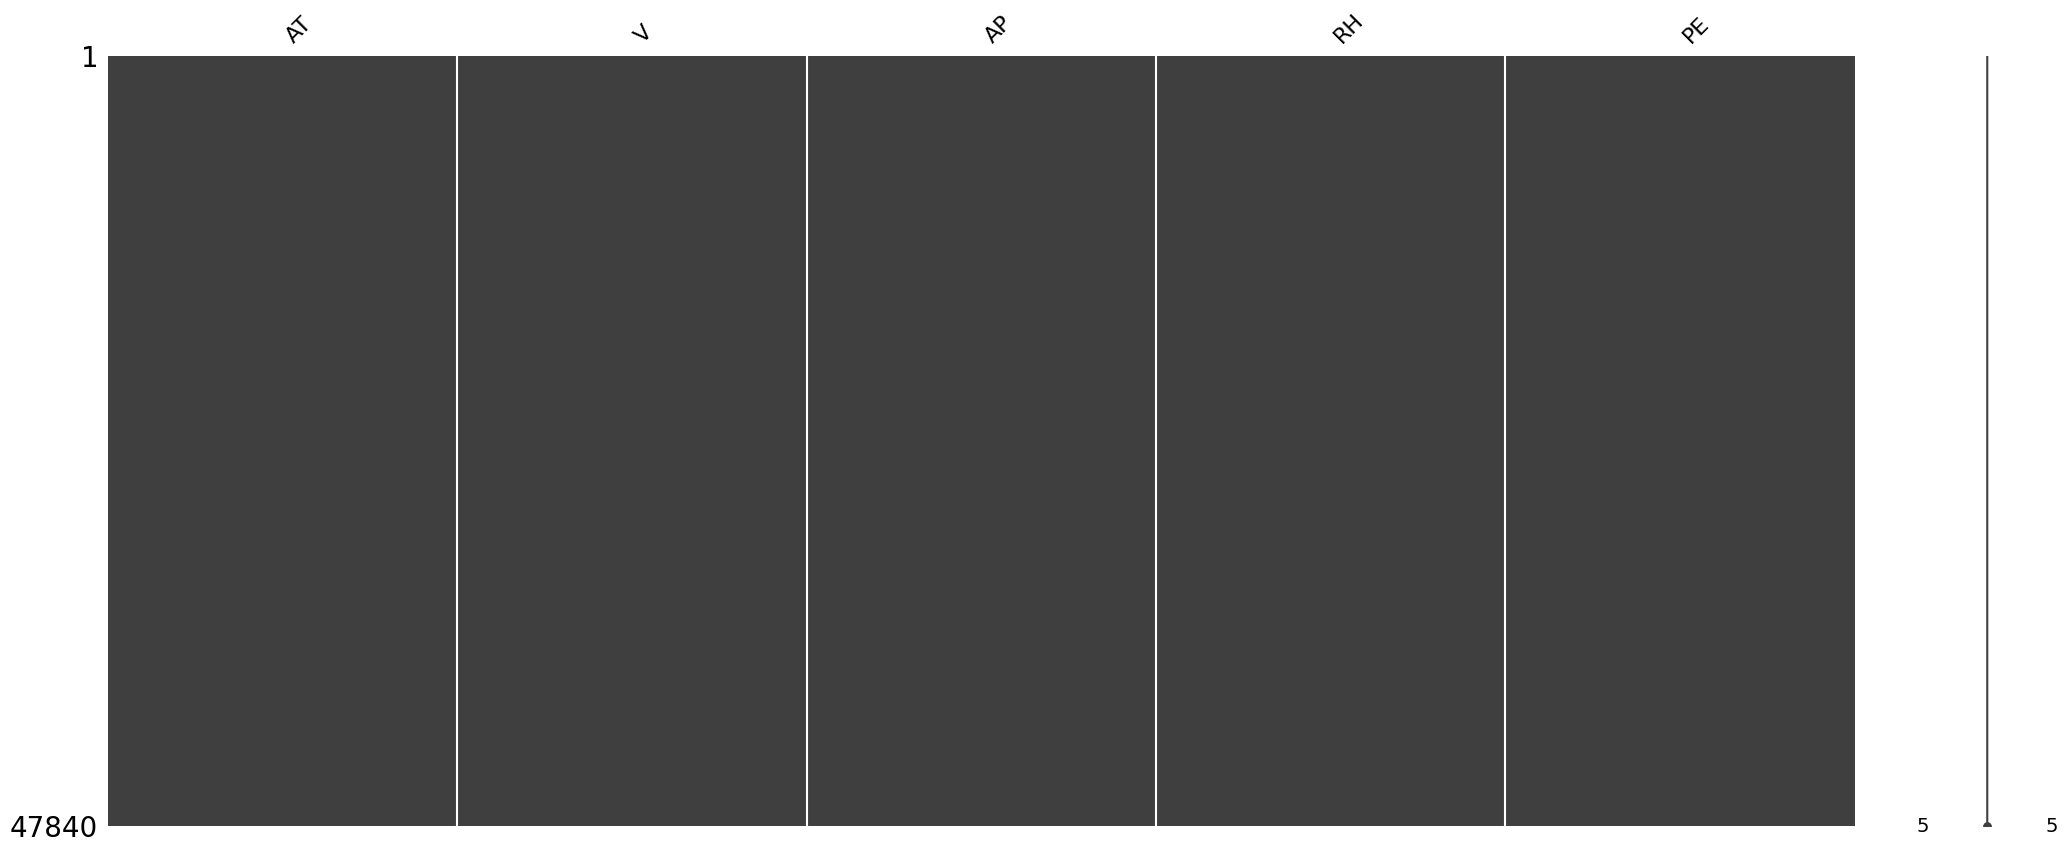

In [7]:
missingno.matrix(df)
plt.show()

Dari plot missingno diatas, bisa disimpulkan bahwa data ini sudah bersih dan tidak ada missing value sehingga tidak memerlukan data cleaning lagi

In [8]:
df.describe()

AT             V            AP            RH            PE
count  47840.000000  47840.000000  47840.000000  47840.000000  47840.000000
mean      19.651231     54.305804   1013.259078     73.308978    454.365009
std        7.452162     12.707362      5.938535     14.599658     17.066281
min        1.810000     25.360000    992.890000     25.560000    420.260000
25%       13.510000     41.740000   1009.100000     63.327500    439.750000
50%       20.345000     52.080000   1012.940000     74.975000    451.550000
75%       25.720000     66.540000   1017.260000     84.830000    468.430000
max       37.110000     81.560000   1033.300000    100.160000    495.760000

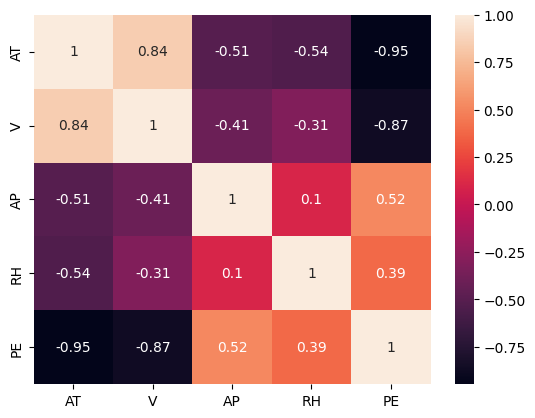

In [9]:
sns.heatmap(df.corr(), annot=True)
plt.show()

c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

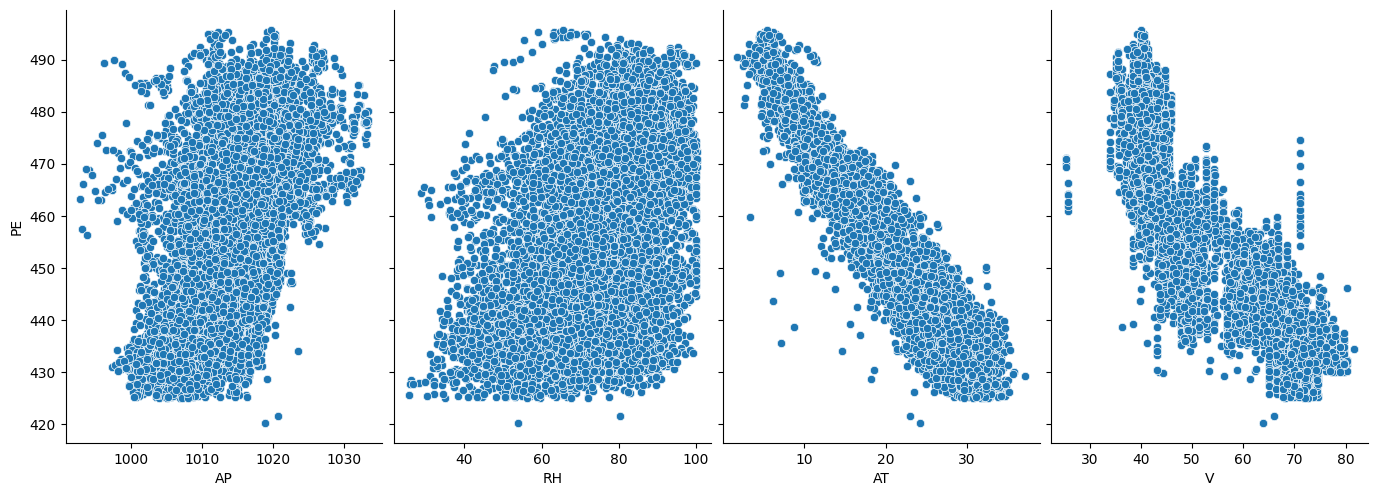

In [11]:
sns.pairplot(df,x_vars=['AP','RH','AT','V'],y_vars='PE',height=5,aspect=0.7)
plt.show()

Dari plot diatas, bisa dilihat ada beberapa parameter yang hubungannya linear seperti temperatur (AT), exhaust vacuum(V), ambient pressure (AP), dan relative humidity(RH). Semuanya memiliki korelasi terhadap energy ouput (PE) sesuai pada heatmap sebelumnya, yang mana korelasi tertinggi ada pada AT dan V.

In [12]:
px.scatter(df, x = "AT", y = "PE")

In [13]:
px.scatter(df, x = "V", y = "PE")

Dari plot diatas, bisa disimpulkan bahwa energi yang dihasilkan oleh suatu Combined Cycle Power Plant dipengaruhi oleh parameter temperatur, exhaust vacuum, relative humidity, dan ambient pressure yang mana variabel temperatur dan exhaust vacuum memiliki pengaruh yang lebih tinggi dibanding variabel lain. 

Letak pengukuran parameter-parameter


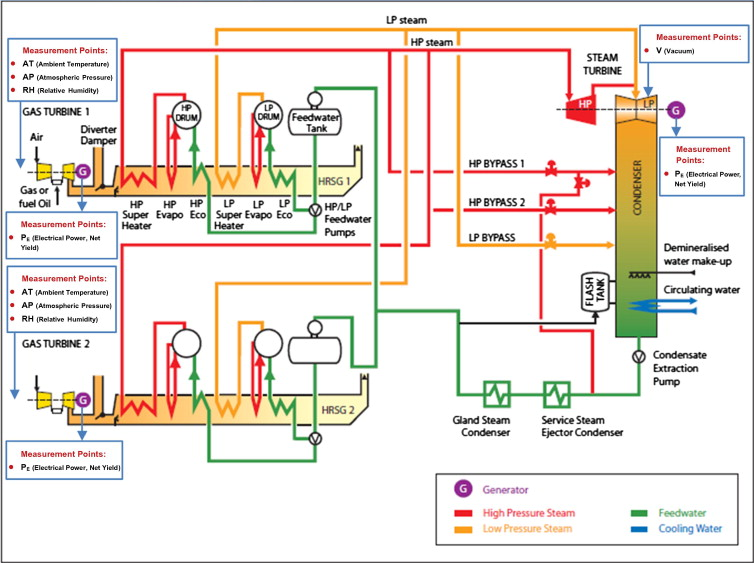

In [14]:
img = Image.open("ccpp measurement.jpg")
print("Letak pengukuran parameter-parameter")
img

Untuk susunan power plant yang sama seperti gambar diatas, bisa diprediksi energi output yang akan dihasilkan dengan mempertimbangkan parameter temperatur dan exhaust vacuum. Pada paper yang menggunakan dataset ini, digunakan beberapa algoritma machine learning untuk memprediksi output power, salah satunya adalah regresi linear. Ada juga algoritma berbasis decision tree yang juga menghasilkan prediksi yang bagus. Nantinya, kami akan menggunakan salah satu algoritma yang digunakan pada paper tersebut untuk memprediksi energy ouput berdasar dataset yang kami gunakan.